Project Goal

Predict whether a passenger survived or not based on features like age, sex, class, fare, etc. This is a binary classification problem:

Target variable: Survived (0 = did not survive, 1 = survived)

Features (inputs): Passenger data like Pclass, Sex, Age, SibSp, Parch, Fare, Embarked, etc.

We’ll use machine learning algorithms like:

Logistic Regression – a simple, interpretable model for binary outcomes

Decision Trees – captures non-linear relationships

Random Forest – an ensemble method that reduces overfitting and improves accuracy

In [6]:
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv("Titanic-Dataset.csv")

# -------------------------
# 1️⃣ Handle missing values
# -------------------------
# Fill Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Fill Age with median by Pclass and Sex (use transform)
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

# Drop Cabin
df.drop('Cabin', axis=1, inplace=True)

# -------------------------
# 2️⃣ Feature engineering
# -------------------------
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
rare_titles = ['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
df['Title'] = df['Title'].replace(rare_titles, 'Rare')
df['Title'] = df['Title'].replace({'Mlle':'Miss', 'Ms':'Miss', 'Mme':'Mrs'})

df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
df['IsAlone'] = np.where(df['FamilySize'] > 1, 0, 1)

# -------------------------
# 3️⃣ Encode categorical variables
# -------------------------
df['Sex'] = df['Sex'].map({'male':0, 'female':1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)
df = pd.get_dummies(df, columns=['Title'], drop_first=True)

# -------------------------
# 4️⃣ Drop irrelevant columns
# -------------------------
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

# -------------------------
# 5️⃣ Check cleaned dataset
# -------------------------
print(df.head())
print(df.isna().sum())


   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  FamilySize  IsAlone  \
0         0       3    0  22.0      1      0   7.2500           2        0   
1         1       1    1  38.0      1      0  71.2833           2        0   
2         1       3    1  26.0      0      0   7.9250           1        1   
3         1       1    1  35.0      1      0  53.1000           2        0   
4         0       3    0  35.0      0      0   8.0500           1        1   

   Embarked_Q  Embarked_S  Title_Miss  Title_Mr  Title_Mrs  Title_Rare  
0       False        True       False      True      False       False  
1       False       False       False     False       True       False  
2       False        True        True     False      False       False  
3       False        True       False     False       True       False  
4       False        True       False      True      False       False  
Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch        

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# -------------------------
# 1️⃣ Split dataset
# -------------------------
X = df.drop('Survived', axis=1)
y = df['Survived']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -------------------------
# 2️⃣ Logistic Regression
# -------------------------
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))
print("Classification Report:\n", classification_report(y_test, y_pred_logreg))

# -------------------------
# 3️⃣ Decision Tree
# -------------------------
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)
y_pred_tree = dtree.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tree))
print("Classification Report:\n", classification_report(y_test, y_pred_tree))

# -------------------------
# 4️⃣ Random Forest
# -------------------------
rforest = RandomForestClassifier(n_estimators=100, random_state=42)
rforest.fit(X_train, y_train)
y_pred_rf = rforest.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Logistic Regression Accuracy: 0.8156424581005587
Confusion Matrix:
 [[89 16]
 [17 57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

Decision Tree Accuracy: 0.7877094972067039
Confusion Matrix:
 [[87 18]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179

Random Forest Accuracy: 0.8324022346368715
Confusion Matrix:
 [[89 16]
 [14 60]]
Classification Report:
               precision  

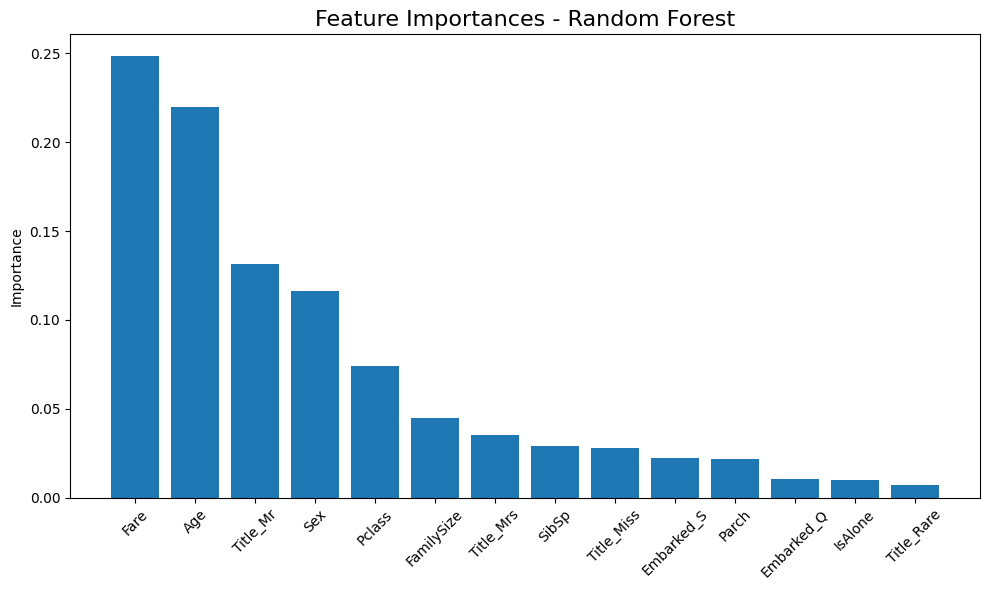

In [8]:
import matplotlib.pyplot as plt

# Get feature importances from Random Forest
importances = rforest.feature_importances_
features = X.columns

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Plot
plt.figure(figsize=(10,6))
plt.title("Feature Importances - Random Forest", fontsize=16)
plt.bar(range(len(features)), importances[indices], align='center')
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# -------------------------
# 1️ Define parameter grid
# -------------------------
param_grid = {
    'n_estimators': [100, 200, 300],       # Number of trees
    'max_depth': [None, 5, 10, 15],       # Max depth of tree
    'min_samples_split': [2, 5, 10],      # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],        # Minimum samples in a leaf node
    'max_features': ['auto', 'sqrt']      # Number of features to consider at each split
}

# -------------------------
# 2️ Set up GridSearchCV
# -------------------------
rforest = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=rforest,
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    n_jobs=-1,           # Use all cores
    scoring='accuracy'   # Optimize for accuracy
)

# -------------------------
# 3️ Fit GridSearchCV
# -------------------------
grid_search.fit(X_train, y_train)

# -------------------------
# 4️ Best parameters and score
# -------------------------
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# -------------------------
# 5️ Evaluate on test set
# -------------------------
best_rf = grid_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Tuned Random Forest Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_best_rf))


/Users/yengsebastian/Documents/ML_DL Journey/intro/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:490: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
188 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/yengsebastian/Documents/ML_DL Journey/intro/venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/yengsebastian/Documents/ML_DL Journey/intro/venv/lib/python3.11/site-packages/sklearn/base.py", line 1329, in wrapper
    estimator._validate_params()
  File "/Users/yengsebastian/Documents/ML_DL Journey/int

Best Parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-Validation Accuracy: 0.8342263370432385
Tuned Random Forest Accuracy: 0.8268156424581006
Confusion Matrix:
 [[92 13]
 [18 56]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86       105
           1       0.81      0.76      0.78        74

    accuracy                           0.83       179
   macro avg       0.82      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179

